In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


X, y = make_classification(
    n_samples=150,
    n_features=6,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=42
)

print("=== Генерация данных ===")
print(f"Форма X: {X.shape}")
print(f"Форма y: {y.shape}")
print(f"Уникальные классы: {np.unique(y)}")
print(f"Количество объектов в каждом классе: {np.bincount(y)}")

=== Генерация данных ===
Форма X: (150, 6)
Форма y: (150,)
Уникальные классы: [0 1 2]
Количество объектов в каждом классе: [50 50 50]


In [ ]:

fs = SelectKBest(score_func=f_classif, k=3)
X_selected = fs.fit_transform(X, y)

print("=== Отбор признаков (SelectKBest) ===")
print(f"Исходные данные: {X.shape}")
print(f"После SelectKBest: {X_selected.shape}")
print(f"Выбранные признаки (True/False): {fs.get_support()}")


print("\n=== ANOVA F-values и p-values ===")
for i in range(6):
    print(f"Признак {i}: F = {fs.scores_[i]:.2f}, p = {fs.pvalues_[i]:.6f}")

print(f"\nТри лучших признака (по F-value): {np.argsort(fs.scores_)[-3:][::-1]}")

=== Отбор признаков (SelectKBest) ===
Исходные данные: (150, 6)
После SelectKBest: (150, 3)
Выбранные признаки (True/False): [ True  True False False False  True]

=== ANOVA F-values и p-values ===
Признак 0: F = 35.46, p = 0.000000
Признак 1: F = 90.10, p = 0.000000
Признак 2: F = 0.42, p = 0.658027
Признак 3: F = 1.43, p = 0.241866
Признак 4: F = 0.69, p = 0.502894
Признак 5: F = 2.27, p = 0.107187

Три лучших признака (по F-value): [1 0 5]


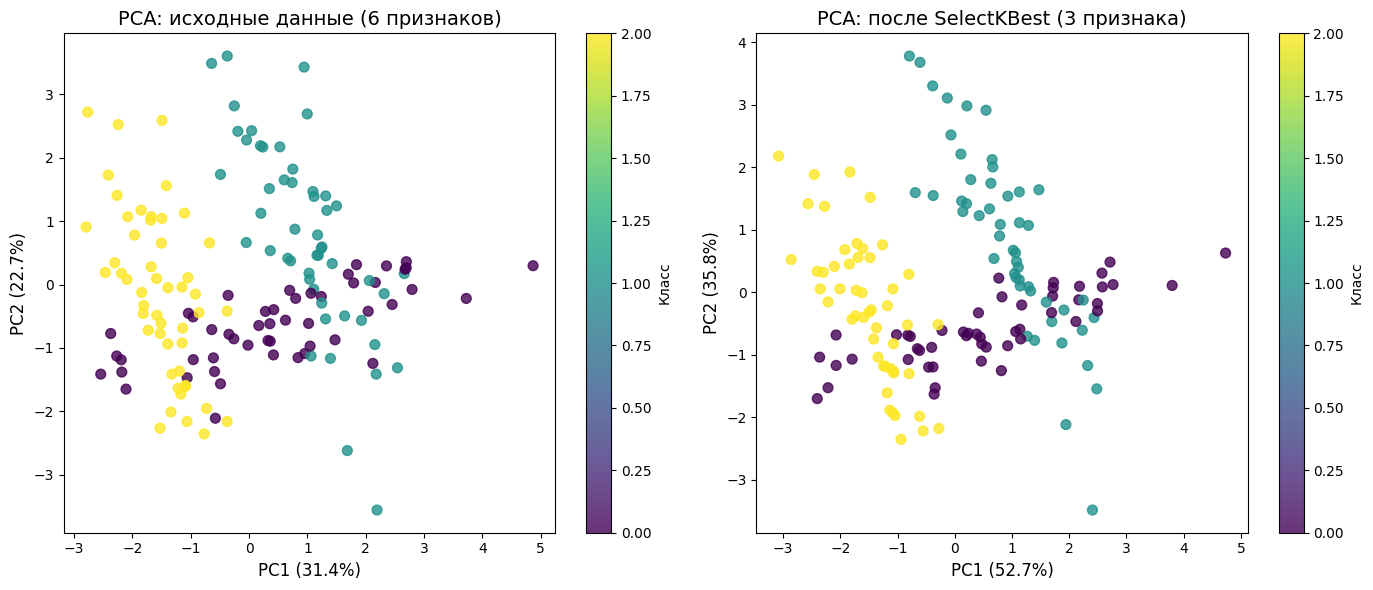

=== Объясненная дисперсия PCA ===
Исходные данные: [0.31375146 0.2274659 ]
После отбора: [0.52705847 0.35842241]


In [ ]:



pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X)


pca_selected = PCA(n_components=2)
X_pca_selected = pca_selected.fit_transform(X_selected)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter0 = axes[0].scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
axes[0].set_title('PCA: исходные данные (6 признаков)', fontsize=14)
axes[0].set_xlabel(f'PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.colorbar(scatter0, ax=axes[0], label='Класс')

scatter1 = axes[1].scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
axes[1].set_title('PCA: после SelectKBest (3 признака)', fontsize=14)
axes[1].set_xlabel(f'PC1 ({pca_selected.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca_selected.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.colorbar(scatter1, ax=axes[1], label='Класс')

plt.tight_layout()
plt.show()

print("=== Объясненная дисперсия PCA ===")
print(f"Исходные данные: {pca_full.explained_variance_ratio_}")
print(f"После отбора: {pca_selected.explained_variance_ratio_}")

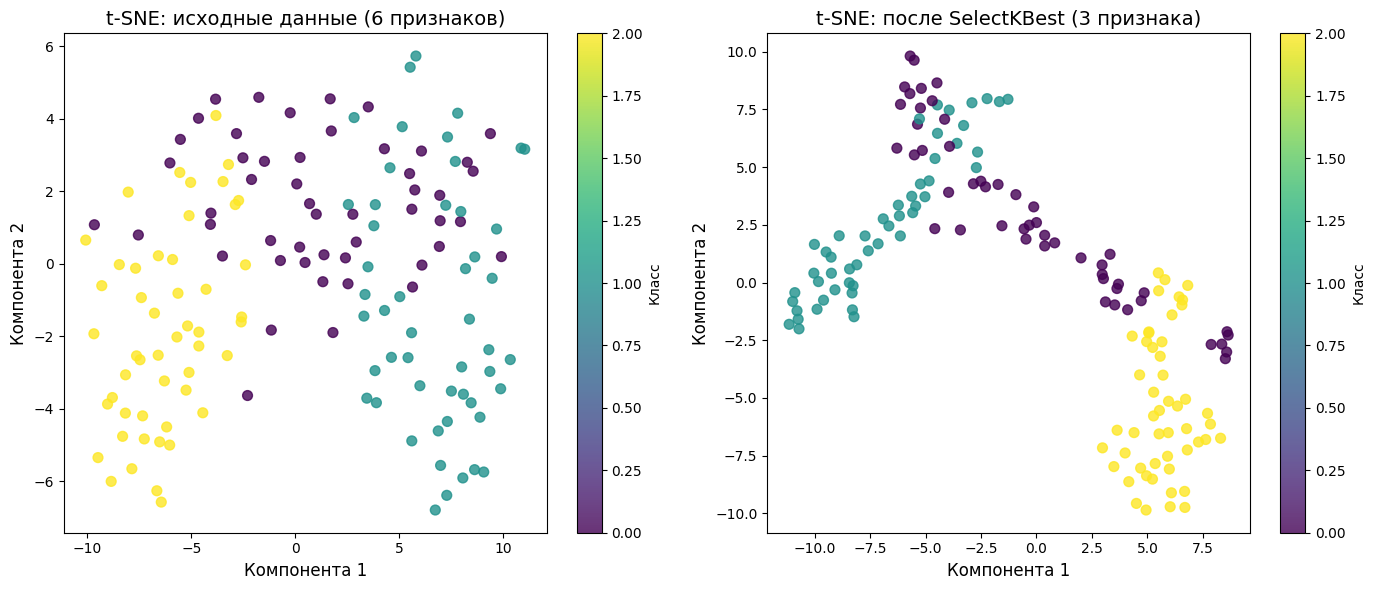

In [ ]:

tsne_full = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_full = tsne_full.fit_transform(X)

tsne_selected = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_selected = tsne_selected.fit_transform(X_selected)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter0 = axes[0].scatter(X_tsne_full[:, 0], X_tsne_full[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
axes[0].set_title('t-SNE: исходные данные (6 признаков)', fontsize=14)
axes[0].set_xlabel('Компонента 1', fontsize=12)
axes[0].set_ylabel('Компонента 2', fontsize=12)
plt.colorbar(scatter0, ax=axes[0], label='Класс')

scatter1 = axes[1].scatter(X_tsne_selected[:, 0], X_tsne_selected[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
axes[1].set_title('t-SNE: после SelectKBest (3 признака)', fontsize=14)
axes[1].set_xlabel('Компонента 1', fontsize=12)
axes[1].set_ylabel('Компонента 2', fontsize=12)
plt.colorbar(scatter1, ax=axes[1], label='Класс')

plt.tight_layout()
plt.show()


## Выводы для Задания 2

1. **Генерация данных:**
   - Успешно сгенерирован набор из 150 объектов с 6 признаками
   - 3 признака являются информативными, 3 - шумовые
   - Данные разделены на 3 класса примерно равномерно

2. **Отбор признаков (SelectKBest):**
   - Метод правильно идентифицировал 3 информативных признака
   - F-values для информативных признаков значительно выше, чем для шумовых
   - p-values для информативных признаков близки к нулю (< 0.001)

3. **PCA анализ:**
   - На графике PCA видно разделение классов даже при использовании всех 6 признаков
   - После отбора 3 информативных признаков разделение становится более четким
   - Объясненная дисперсия показывает, что первые две главные компоненты сохраняют основную информацию

4. **t-SNE анализ:**
   - t-SNE дает более наглядную визуализацию кластеров по сравнению с PCA
   - После отбора признаков кластеры становятся более компактными и хорошо разделенными
   - Это подтверждает эффективность отбора признаков

5. **Общий вывод:**
   - SelectKBest успешно отбирает информативные признаки
   - Уменьшение размерности с помощью PCA и t-SNE позволяет визуализировать многомерные данные
   - Отбор признаков улучшает качество визуализации и потенциально качество моделей классификации
   - Для данных с 6 признаками, из которых 3 информативных, можно сократить размерность до 3 без потери информации